In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import yaml
import numpy as np
from audio_classification.data import BMWDataset
from audio_classification.tools import get_transform
from audio_classification.utils import class_weighting

Training on device cuda.


In [2]:
with open("/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw_half.yaml", "r") as config_file:
    configs = yaml.load(config_file)

In [3]:
sets = BMWDataset(configs, transform=None)
print("BMW dataset contains {} clips".format(len(sets)))

BMW dataset contains 1091 clips


In [5]:
labels = []
lengths = []
for i in range(0, len(sets)):
    sample = sets[i]
    lengths.append(sample[0].shape[1])
    labels.append(sample[1])

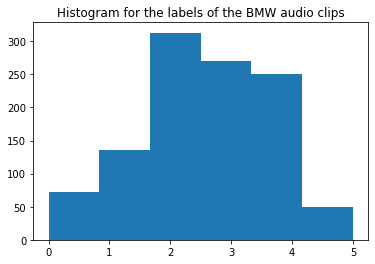

In [6]:
# distribution of labels
labels = np.array(labels)

plt.title("Histogram for the labels of the BMW audio clips")
plt.hist(labels, bins=6)
plt.show()

BMW audio clips have a median length of 184256.00


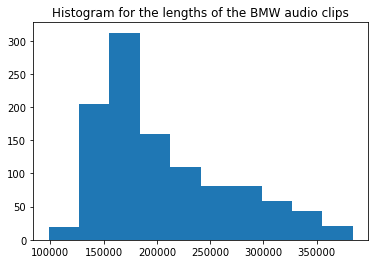

In [7]:
# distribution of audio length
lengths = np.array(lengths)
print("BMW audio clips have a median length of {:.2f}".format(np.median(lengths)))

plt.title("Histogram for the lengths of the BMW audio clips")
plt.hist(lengths)
plt.show()

label 0
torch.Size([1, 96, 720])


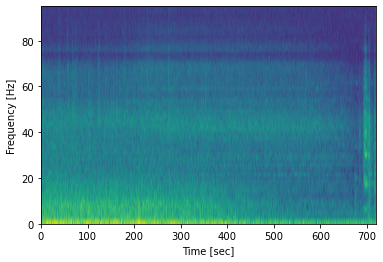

In [8]:
# visualize melspectrogram
transform = get_transform(configs)
sets = BMWDataset(configs, transform=transform)
sample = sets.__getitem__(0)
print("label %s" %(sample[1]))
print(sample[0].shape)
plt.pcolormesh(sample[0].squeeze().numpy(), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()